# Project 9

For my Project, I decided to analyze an NFL dataset, which claims to have every play in the 2022 NFL season. My two questions I decided to answer were:

1.) Is there a correlation between big plays for each team's offense and their ranking, specifically in relation to the points per game average?

2.) Which down converted a first down the most? Which team had the most first downs? Which team had the least? Which team converted 3rd down the most?

In [97]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

In [98]:
# Imports
df = pd.read_csv("pbp-2022.csv")
df

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2022091106,2022-09-11,2,1,17,MIA,NE,2,10,55,...,0,0,NaN,45,OPP,0,NaN,0,NaN,0
1,2022091106,2022-09-11,3,7,4,NE,MIA,4,1,72,...,0,0,NaN,28,OPP,1,MIA,1,ILLEGAL CONTACT,5
2,2022091106,2022-09-11,3,6,57,NE,MIA,1,10,77,...,0,0,CENTER,23,OPP,0,NaN,0,NaN,0
3,2022091106,2022-09-11,3,6,17,NE,MIA,2,10,77,...,0,0,NaN,23,OPP,0,NaN,0,NaN,0
4,2022091106,2022-09-11,4,9,46,NE,MIA,4,3,100,...,0,0,NaN,0,OPP,0,NE,0,OFFENSIVE HOLDING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38593,2022091101,2022-09-11,4,4,59,CLE,CAR,2,7,28,...,0,0,CENTER,28,OWN,0,NaN,0,NaN,0
38594,2022091101,2022-09-11,4,5,36,CLE,CAR,1,15,20,...,0,0,NaN,20,OWN,0,NaN,0,NaN,0
38595,2022091101,2022-09-11,4,6,2,CLE,CAR,1,10,25,...,0,0,NaN,25,OWN,1,CLE,1,INELIGIBLE DOWNFIELD PASS,5
38596,2022091101,2022-09-11,4,6,2,CAR,CLE,0,0,35,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0


I was curious to see if this dataset did actually have every play from the 2022 NFL season, so I will do a quick check to see when the last play's date was.

In [99]:
df["GameDate"] = pd.to_datetime(df["GameDate"])
print(df["GameDate"].max())

2022-12-18 00:00:00


It seems as if the last date is the Sunday of Week 15 of 2022, so not quite the whole season but a large enough sample size to analyze.

Just for some context, I am defining a Big Play as a run of 15-plus yards and/or a pass of 20-plus yards.

In [100]:
# Q1
# Making a new dataset containing every big play
df_passes = df[df["PlayType"] == "PASS"]
df_big_plays_passes = df_passes[df_passes["Yards"] > 20]
df_rushes = df[df["PlayType"] == "RUSH"]
df_big_plays_rushes = df_rushes[df_rushes["Yards"] > 15]
df_big_plays = pd.concat([df_big_plays_rushes, df_big_plays_passes])
df_big_plays = df_big_plays.sort_values(by = "GameDate")

In [101]:
df_big_plays["OffenseTeam"].value_counts()

KC     80
DAL    73
PHI    70
NYJ    67
SF     66
SEA    66
NE     66
BUF    63
JAX    61
LV     58
GB     57
CLE    57
DET    56
CIN    56
MIA    55
HOU    54
TEN    54
CAR    52
DEN    52
ATL    51
BAL    50
LAC    50
CHI    49
PIT    49
ARI    48
WAS    48
MIN    45
TB     42
LA     41
NO     41
IND    38
NYG    35
Name: OffenseTeam, dtype: int64

We are going to analyze the top 7 teams, and compare each team with their offensive points per game average rankings.
(Points per game data was taken from Pro-Football-Reference)

#1: Chiefs (80 big plays) were ranked #1 in points per game, with a 29.2 avg.

#2: Cowboys (73 big plays) were ranked #4 in points per game, with a 27.5 avg.

#3: Eagles (70 big plays) were ranked #3 in points per game, with a 28.1 avg.

#4: Jets (67 big plays) were ranked #29 in points per game, with a 17.4 avg.

#T-5: 49ers (66 big plays) were ranked #6 in points per game, with a 26.5 avg.

#T-5: Seahawks (66 big plays) were ranked #9 in points per game, with a 23.9 avg.

#T-5: Patriots (66 big plays) were ranked #17 in points per game, with a 21.4 avg.

Obviously, the biggest surprises for me were the Patriots and the Jets, as from what I remembered from last season, they were well respected and known for their stellar defenses, while having not the best offenses, as seen in the points per game rankings, as both teams are in the bottom half, with the jets being in the bottom 5.

Notable teams left off were the Lions and the Bills. Both teams are known for being offensive juggernauts, as the Bills were #2 in points per game and the Lions were #5 in points per game, yet they failed to crack the top 5 in big plays from Week 1 - Week 15.

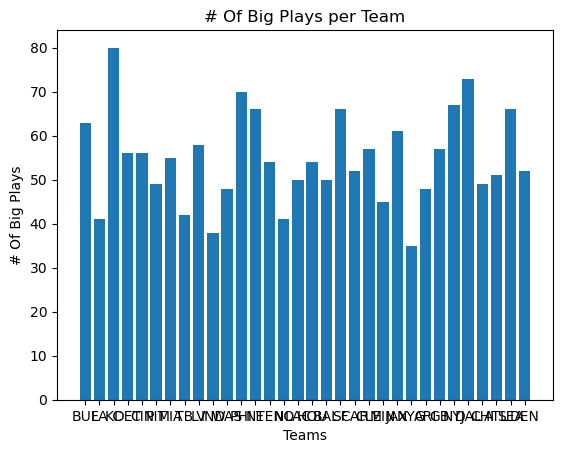

In [111]:
plt.bar(df_big_plays["OffenseTeam"], df_big_plays.groupby("OffenseTeam")["OffenseTeam"].transform("count"))
plt.xlabel("Teams")
plt.ylabel("# Of Big Plays")
plt.title("# Of Big Plays per Team")
plt.show()

Just as some extra work, and me being curious I decided to do the same with defense.

In [103]:
df_big_plays["DefenseTeam"].value_counts()

SEA    67
HOU    66
MIN    65
LAC    65
TEN    64
PIT    63
GB     63
DET    63
LV     62
CHI    61
CAR    61
CLE    58
JAX    57
NE     57
NYG    56
ATL    55
CIN    53
ARI    52
TB     51
IND    51
WAS    50
BAL    50
MIA    49
BUF    48
KC     48
PHI    47
DAL    46
DEN    46
SF     45
NO     45
NYJ    44
LA     42
Name: DefenseTeam, dtype: int64

Now, for the defenses, we are going to analyze the top 8 teams, and compare each team with their defensive points per game average rankings.
(Points per game data was taken from Pro-Football-Reference)

#1: Seahawks (67 big plays) were ranked #25 in points per game given up, with a 23.6 avg.

#2: Texans (66 big plays) were ranked #27 in points per game given up, with a 24.7 avg.

#T-3: Vikings (65 big plays) were ranked #T-28 in points per game given up, with a 25.1 avg.

#T-3: Chargers (65 big plays) were ranked #21 in points per game given up, with a 22.6 avg.

#5: Titans (64 big plays) were ranked #14 in points per game given up, with a 21.1 avg.

#T-6: Steelers (63 big plays) were ranked #10 in points per game given up, with a 20.4 avg.

#T-6: Packers (63 big plays) were ranked #17 in points per game given up, with a 21.8 avg.

#T-6: Lions (63 big plays) were ranked #T-28 in points per game given up, with a 25.1 avg.

Everything checks out for the most part, except for the Titans and Steelers for me. Steelers and Titans have been known for having suffocating defenses, especially the Steelers, so it was surprising to see them on this list.

Notable teams that were left off are the Bears and the Cardinals, who were ranked #32 and #31, respectively.

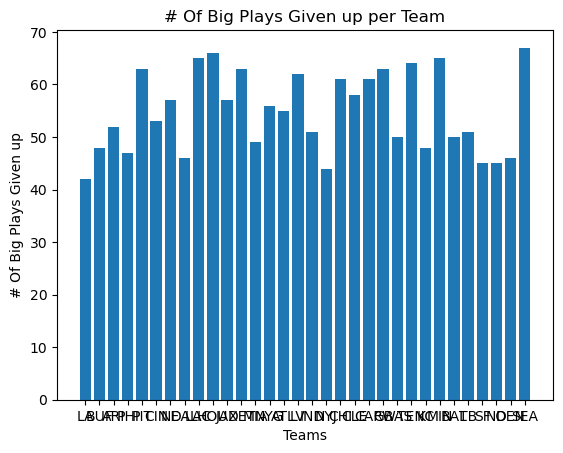

In [104]:
plt.bar(df_big_plays["DefenseTeam"], df_big_plays.groupby("DefenseTeam")["DefenseTeam"].transform("count"))
plt.xlabel("Teams")
plt.ylabel("# Of Big Plays Given up")
plt.title("# Of Big Plays Given up per Team")
plt.show()

In [105]:
# Q2
df_first_down = df[df["SeriesFirstDown"] == 1]
df_first_down = df_first_down[df_first_down["Down"] != 0]

In [106]:
# Which down had the highest chance of achieving a first down?
df_first_down["Down"].value_counts()

2    2997
1    2359
3    2227
4     292
Name: Down, dtype: int64

It seems like 2nd down had the highest conversion rate, with 1st down being 2nd and then 3rd down being 3rd, while 4th down was in last place.

In [107]:
# Which team had the most first downs?
df_first_down["OffenseTeam"].value_counts()

KC     312
PHI    300
DET    272
CIN    271
DAL    269
BUF    269
LAC    269
JAX    268
SF     262
CLE    261
LV     260
TB     258
SEA    256
ARI    256
PIT    255
BAL    248
MIA    244
WAS    243
MIN    243
NYG    233
NYJ    232
IND    229
NO     226
CHI    226
NE     225
GB     223
ATL    223
DEN    220
LA     215
HOU    207
TEN    207
CAR    193
Name: OffenseTeam, dtype: int64

The Chiefs had the most first downs, with the Eagles, Lions, Bengals being 2, 3, and 4 respectively, while the cowboys, Bills and Chargers were tied for 5th.

In [108]:
# Which team had the least first downs? 
df_first_down["OffenseTeam"].value_counts()

KC     312
PHI    300
DET    272
CIN    271
DAL    269
BUF    269
LAC    269
JAX    268
SF     262
CLE    261
LV     260
TB     258
SEA    256
ARI    256
PIT    255
BAL    248
MIA    244
WAS    243
MIN    243
NYG    233
NYJ    232
IND    229
NO     226
CHI    226
NE     225
GB     223
ATL    223
DEN    220
LA     215
HOU    207
TEN    207
CAR    193
Name: OffenseTeam, dtype: int64

The Panthers, Titans, Texans, Rams, and Broncos were the bottom 5 teams that converted for 1st downs.

In [109]:
# Which team converted 3rd down the most?
df_third_down = df_first_down[df_first_down["Down"] == 3]
df_third_down["OffenseTeam"].value_counts()

LAC    91
PHI    87
DAL    86
SF     84
CHI    82
PIT    80
KC     80
CIN    77
TB     75
NYJ    74
DET    74
BUF    72
BAL    71
JAX    71
MIN    70
ARI    69
IND    67
NO     66
CLE    66
LV     66
NYG    65
SEA    65
LA     65
TEN    64
WAS    64
NE     63
GB     60
DEN    59
ATL    58
MIA    54
HOU    53
CAR    49
Name: OffenseTeam, dtype: int64

It seems like the Chargers, Eagles, Cowboys, 49ers, and the Bears were the top 5 teams that converted third downs.

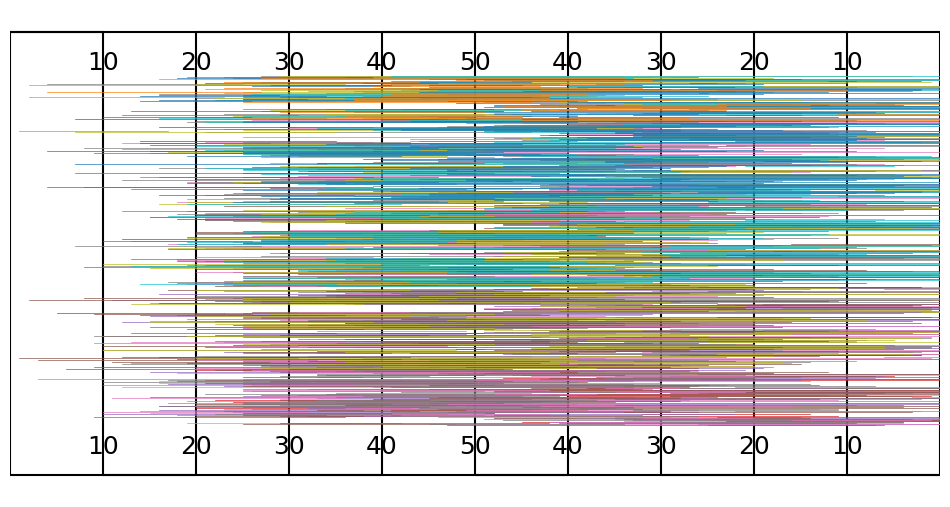

In [110]:
# Above and Beyond
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth = 0.1, edgecolor = "r", facecolor = "white")
fig, ax = plt.subplots(1, figsize = (12, 6.33))
ax.add_patch(rect)
plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80, 80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120], [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3], color = "Black")
for x in range(20, 110, 10):
    numb = x
    if x > 50:
        numb = 120 - x
    plt.text(x, 2.5, str(numb - 10), horizontalalignment = "center", fontsize = 18, color = "black")
    plt.text(x, 53.3 - 4.5, str(numb - 10), horizontalalignment = "center", fontsize = 18, color = "black")

plt.xlim(10, 110)
plt.axis("off")

index = 0
for i in df_big_plays.index:
    plt.plot([10 + df_big_plays["YardLine"][i], 10 + df_big_plays["YardLine"][i] + df_big_plays["Yards"][i]], [6 + (42 * (index / len(df_big_plays))), 6 + (42 * (index / len(df_big_plays)))], label = df_big_plays["OffenseTeam"][i], linewidth = 0.5)
    index += 1
plt.show()

For my Above and Beyond, I decided to visualize every single big play. I tried my best to make a football field, and it was super fun and cool to think of how to make. One pattern that I do see though when I look at it, is that there are a lot of plays that start at the 25 yard line, which is where the ball is placed on a touchback, so I thought that was cool to point out.